#  Subject 1: CO2 concentration in the atmosphere since 1958

In [1]:
# Importation des bibliothèques nécessaires
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import isoweek

In [2]:
# Téléchargement et chargement des données
data_url = "https://scrippsco2.ucsd.edu/assets/data/atmospheric/stations/in_situ_co2/weekly/weekly_in_situ_co2_mlo.csv"

In [3]:
# Charger les données à partir d'un fichier CSV local
data_file = "weekly_in_situ_co2.csv"

import os
import urllib.request
if not os.path.exists(data_file):
    urllib.request.urlretrieve(data_url, data_file)

In [ ]:
# Charger les données dans une table de pandas
# data = pd.read_csv(data_file, skiprows=44, sep=r'\s+', engine='python', parse_dates=[0], index_col=[0], names = ['Date', 'Concentration'])
data = pd.read_csv(data_file, skiprows=44, sep=r'\s+', engine='python', parse_dates=[0], index_col=[0], names = ['Date', 'Concentration'])
# Affichage des premières lignes des données pour vérification
print(data.head())

In [11]:
# Toutes les lignes contenant au moins une valeur nulle (NaN) dans une colonne sont supprimées
# data_subset = data.dropna()

In [ ]:
# Réalisation du graphique complet
plt.figure(figsize=(15, 6))
plt.plot(data['Date'], data['Concentration'], label='CO2 Concentration')
plt.title('CO2 Concentration Over Time')
plt.xlabel('Year')
plt.ylabel('CO2 Concentration (ppm)')
plt.legend()
plt.grid(True)
plt.show()

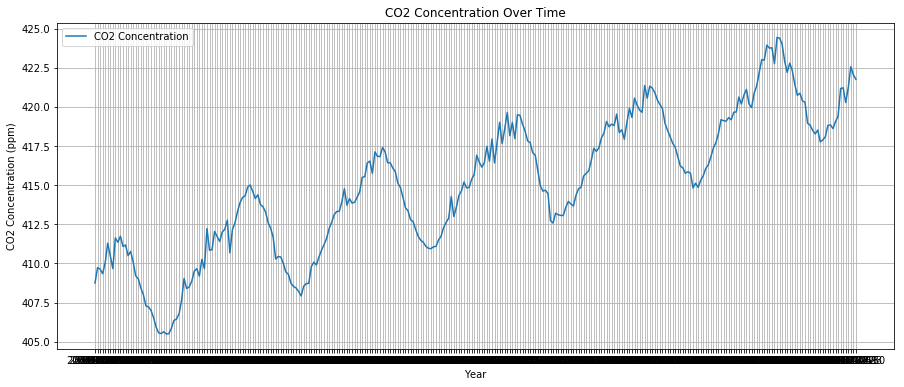

In [7]:
# Réalisation du graphique pour montrer l'oscillation (300 dernières lignes du tableau)
plt.figure(figsize=(15, 6))
plt.plot(data['Date'][-300:], data['Concentration'][-300:], label='CO2 Concentration')
plt.title('CO2 Concentration Over Time')
plt.xlabel('Year')
plt.ylabel('CO2 Concentration (ppm)')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Convertir la columna 'Date' a tipo de datos de fecha
data['Date'] = pd.to_datetime(data['Date'])
# Extrayez l'année de la colonne 'Date' et créez une nouvelle colonne 'Année'
data['Year'] = data['Date'].dt.year
print(data.head())

In [ ]:
# Calculez la valeur moyenne par an et créez une nouvelle colonne 'Concentration moyenne de CO2'
data['Mean CO2 Concentration'] = data.groupby('Year')['Concentration'].transform('mean')
print(data.head())

In [ ]:
# Création du graphique pour montrer la concentration moyenne de CO2 par an au fil du temps
plt.figure(figsize=(10, 6))
plt.plot(data['Date'], data['Mean CO2 Concentration'], label='Mean CO2 Concentration per Year Over Time')
plt.title('Mean CO2 Concentration per Year Over Time')
plt.xlabel('Year')
plt.ylabel('CO2 Concentration (ppm)')
plt.legend()
plt.show()

# Subject 4: Latency and capacity estimation for a network connection from asymmetric measurements


In [ ]:
# Importation des bibliothèques nécessaires
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import isoweek

In [ ]:
# Importation des bibliothèques nécessaires
url_liglab2 = "http://mescal.imag.fr/membres/arnaud.legrand/teaching/2014/RICM4_EP_ping/liglab2.log.gz"
url_stackoverflow = "http://mescal.imag.fr/membres/arnaud.legrand/teaching/2014/RICM4_EP_ping/stackoverflow.log.gz"

# Charger les données dans un DataFrame pandas
df_liglab2 = pd.read_csv(url_liglab2, sep=" ", header=None)
df_stackoverflow = pd.read_csv(url_stackoverflow, sep=" ", header=None)

In [ ]:
# Affichage des premières lignes des données pour vérification
print(df_liglab2.head())


In [ ]:
# Affichage des premières lignes des données pour vérification
print(df_stackoverflow.head())

In [ ]:
import numpy as np

# Définir une fonction pour extraire les informations pertinentes de chaque ligne
def process_ping_data(df):
    df.dropna(inplace=True)  # Supprimer les lignes incomplètes
    df.columns = ["date", "size", "bytes", "from", "url", "ip", "icmp","ttl","time", "ms"]  # Nommez les colonnes
    df["time"] = df["time"].str[5:].astype(float)  # Extraire le temps en ms et convertir en float (supprimer la chaîne "time-")
    df["date"] = df["date"].str[1:18] # Extraire la date de la première colonne et la convertir au format "datetime"
    df["date"] = pd.to_datetime(df["date"], unit='s')
    return df

# Traiter les données ping pour liglab2 et stackoverflow
df_liglab2 = process_ping_data(df_liglab2)
df_stackoverflow = process_ping_data(df_stackoverflow)


In [ ]:
# Affichage des premières lignes des données pour vérification
print(df_liglab2.head())

In [ ]:
# Affichage des premières lignes des données pour vérification
print(df_stackoverflow.head())

In [ ]:
# Graphique du temps de transmission dans le temps
plt.figure(figsize=(10, 6))
plt.plot(df_liglab2["date"], df_liglab2["time"], label="df_liglab2")
plt.xlabel("Time")
plt.ylabel("Transmission Time (ms)")
plt.title("Transmission time evolution (df_liglab2)")
plt.legend()
plt.show()

In [ ]:
# Graphique du temps de transmission dans le temps
plt.figure(figsize=(10, 6))
plt.plot(df_stackoverflow["date"], df_stackoverflow["time"], label="df_stackoverflow")
plt.xlabel("Time")
plt.ylabel("Transmission Time (ms)")
plt.title("Transmission time evolution (df_stackoverflow)")
plt.legend()
plt.show()

In [ ]:
# Graph of transmission time based on message size
plt.figure(figsize=(10, 6))
plt.plot(df_liglab2["size"], df_liglab2["time"], label="liglab2")
plt.xlabel("Message Size")
plt.ylabel("Transmission Time (ms)")
plt.title("Transmission time evolution (liglab2)")
plt.legend()
plt.show()

In [ ]:
# Graph of transmission time based on message size
plt.figure(figsize=(10, 6))
plt.plot(df_stackoverflow["size"], df_stackoverflow["time"], label="df_stackoverflow")
plt.xlabel("Message Size")
plt.ylabel("Transmission Time (ms)")
plt.title("Transmission time evolution (df_stackoverflow)")
plt.legend()
plt.show()